In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
import nltk


In [183]:
file_path = ('/Users/steven.souksavath/Downloads/Recipe Reviews and User Feedback Dataset.csv')
df = pd.read_csv(file_path)

Based on Cooking recipes - Recipe Reviews and User Feedback

# DEEP LEARNING CLASSIFICATION

In [184]:
df.describe()

,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18182.000000,18182.000000,18182.000000,18182.000000,1.818200e+04,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,121.465295,38.689363,21773.667253,2.159608,1.623710e+09,0.014630,1.089264,0.549335,4.288802,153.162138
std,116.747893,29.786647,23965.109637,10.014666,5.468697e+06,0.137974,4.201004,3.470124,1.544786,141.075316
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,150.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,520.000000,1.665756e+09,3.000000,106.000000,126.000000,5.000000,946.000000


# Data Preprocessing

In [185]:
# Remove Duplicate Recipes

#  Store original shape for comparison
original_shape = df.shape

# Drop duplicates in-place based on comment text, user_id, and recipe_code
df.drop_duplicates(
    subset=['text', 'user_id', 'recipe_code'],
    keep='first',
    inplace=True
)

# Show the impact of duplication
print("Original dataset shape:", original_shape)
print("Dataset shape after removing duplicates:", df.shape)
print(f"Removed {original_shape[0] - df.shape[0]} duplicate comments")

Original dataset shape: (18182, 15)
Dataset shape after removing duplicates: (17880, 15)
Removed 302 duplicate comments


In [186]:
#Dropping variables
df.isnull().sum()
df.dropna()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...


In [187]:
#Fixing the column name
df.rename(columns={'Unnamed: 0': 'num_records'}, inplace=True)

In [188]:
#Change "created at" variable to univerex to UTC

df['created_at_utc'] = pd.to_datetime(df['created_at'], unit='s', utc=True)

In [189]:
# Convert the 'text' column to lowercase
# df['text'] = df['text'].str.lower()

In [190]:
# Remove Duplicate Recipes

#  Store original shape for comparison
original_shape = df.shape

# Drop duplicates in-place based on comment text, user_id, and recipe_code
df.drop_duplicates(
    subset=['text', 'user_id', 'recipe_code'],
    keep='first',
    inplace=True
)

# Show the impact of deduplication
print("Original dataset shape:", original_shape)
print("Dataset shape after removing duplicates:", df.shape)
print(f"Removed {original_shape[0] - df.shape[0]} duplicate comments")

Original dataset shape: (17880, 16)
Dataset shape after removing duplicates: (17880, 16)
Removed 0 duplicate comments


### Word Cleaning and Tokenization

In [191]:
# Ensure NLTK resources are available

import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/steven.souksavath/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/steven.souksavath/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/steven.souksavath/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [192]:
# Replace NaN values with an empty string and convert all values to strings
df['text'] = df['text'].fillna('').astype(str)

In [193]:
# Preprocessing function for text
def preprocess_text(text):
    # Lowercase text
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove special characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    return ' '.join(tokens)

# Apply preprocessing directly to the 'text' column - Text is already tokenized
df['text'] = df['text'].apply(preprocess_text)

In [194]:
from gensim.models import Word2Vec

# Prepare data for Word2Vec
sentences = df['text'].tolist()

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4, sg=1)


In [195]:
# Function to compute average Word2Vec embedding for a sentence
def get_sentence_vector(tokens, model):
    # Get vectors for words that exist in the Word2Vec vocabulary
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    # Return the average vector (or a zero vector if no words in vocabulary)
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Apply the function to each tokenized text in the dataset
df['sentence_vector'] = df['text'].apply(lambda x: get_sentence_vector(x, word2vec_model))

In [196]:
df

,num_records,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,created_at_utc,sentence_vector
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,tweaked little removed onion onion hater house...,2022-10-13 00:11:29+00:00,"[-0.002452917, 0.03672525, 0.038720723, 0.0255..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,bush used white chili bean made recipe super s...,2022-10-09 01:08:07+00:00,"[-0.00036582522, 0.032975223, 0.035805024, 0.0..."
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,complicated white chicken chili recipe made ye...,2022-09-28 22:35:57+00:00,"[-0.0011561874, 0.028901024, 0.030557731, 0.02..."
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,introduction mentioned cream cheese none liste...,2022-08-29 15:43:28+00:00,"[-0.001030292, 0.022385733, 0.028866565, 0.026..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,wonderful made chilistew night dinner church e...,2022-10-04 20:03:43+00:00,"[-0.0038231455, 0.035792112, 0.03739938, 0.022..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,strawberry cake family favorite since past sev...,2021-06-03 10:59:37+00:00,"[-0.004725319, 0.039999682, 0.03831327, 0.0216..."
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,pi received endless compliment cake used firme...,2021-02-11 09:45:20+00:00,"[-0.0014309626, 0.036788005, 0.035267793, 0.01..."
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,cake delicious moist didnt need sugar called f...,2021-06-03 10:57:24+00:00,"[-0.0018554054, 0.035301007, 0.037107013, 0.02..."
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,made wonderful frosting wish made thicker tad ...,2021-06-03 10:47:13+00:00,"[-0.0030031388, 0.036972795, 0.039647233, 0.02..."


In [197]:
#Unique Comments per Recipe - Number of Records per recipe

df[df['num_records'] == 7]

,num_records,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,created_at_utc,sentence_vector
7,7,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_24cuIEu6UoJvd5VRMAoqnTPR9wd,u_uj79hCc4xVhm,Towanka,1,1643942114,0,28,2,0,891,delicious make often one time daughter husband...,2022-02-04 02:35:14+00:00,"[-0.0023411943, 0.03955661, 0.042644616, 0.026..."
661,7,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_28E25mUNpj5EtSosg5szn9jn8Av,u_lWOi5Uvd2Crc,KristineChayes576,50,1650767243,0,3,0,5,710,best ever banana bread great recipe alteration...,2022-04-24 02:27:23+00:00,"[0.0065860595, 0.02238262, 0.026217468, 0.0163..."
1170,7,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_2CrwytxAzv6AnYZVOnN89j0MmJX,u_oM2zCpZL6dDm,MaryAnne254,1,1659574268,0,9,3,5,752,soup excellent first time making homemade soup...,2022-08-04 00:51:08+00:00,"[-0.0012509363, 0.04594081, 0.04437289, 0.0299..."
1895,7,4,17826,Amish Breakfast Casserole,sp_aUSaElGf_17826_c_28w5IIVLttFMpL4IW4b4xGz9Vqz,u_B4HuiYbVsEHf,Brenda5288,1,1652114725,0,12,6,5,624,yummy yummy due high fat salt content year tre...,2022-05-09 16:45:25+00:00,"[-0.00630064, 0.02394681, 0.02291079, 0.027048..."
2233,7,5,42386,Pumpkin Spice Cupcakes with Cream Cheese Frosting,sp_aUSaElGf_42386_c_398240,u_1oKc9AhZnnA8sK5TZH838kiQHKL,KathyGuevara,1,1622718328,0,1,0,5,193,think ive established new holiday staple home ...,2021-06-03 11:05:28+00:00,"[-0.002955234, 0.035440695, 0.03791779, 0.0280..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17635,7,96,3290,Brown Sugar Oatmeal Pancakes,sp_aUSaElGf_3290_c_407418,u_1oKcFTu8PhOq16t7UqyKeZPSsvX,CiciONeill,1,1622718389,0,3,2,5,203,pancake aficionado kid loved recipe said regul...,2021-06-03 11:06:29+00:00,"[7.782359e-06, 0.037538458, 0.036735184, 0.024..."
17744,7,97,34347,Lime Chicken Tacos,sp_aUSaElGf_34347_c_382041,u_1oKaqe7Zsn1fO4kWiMsQZesgi0p,Guest75361888,1,1622718239,0,0,1,5,100,chicken real good,2021-06-03 11:03:59+00:00,"[-0.0051497403, 0.041856542, 0.036777895, 0.01..."
17830,7,98,11767,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_2BA1iEwZP6bcRWdCJSPFz8A9VNo,u_Pl9uyjNERQ96,Betty020,1,1656334201,0,16,5,5,746,tried mushroom buy one get one free wanted get...,2022-06-27 12:50:01+00:00,"[0.0008561545, 0.03544056, 0.039004616, 0.0284..."
17958,7,99,191775,Egg Roll Noodle Bowl,sp_aUSaElGf_191775_c_1xuB3NzyzUtdemA5IWVGBfQTTW6,u_7oJ0YWDuESeV,grandmascooking22,1,1631194892,0,25,12,5,758,made couple adjustmentsused basmati rice dont ...,2021-09-09 13:41:32+00:00,"[0.00025546554, 0.03842954, 0.03839057, 0.0177..."


# EDA

In [198]:
# Group by recipe_number and compute summary statistics
summary_stats = df.groupby('recipe_number').agg(
    total_comments=('comment_id', 'count'),       # Count of comments
    avg_user_reputation=('user_reputation', 'mean'),  # Average user reputation
    avg_reply_count=('reply_count', 'mean'),     # Average reply count
    avg_thumbs_up=('thumbs_up', 'mean'),         # Average thumbs up
    avg_thumbs_down=('thumbs_down', 'mean'),     # Average thumbs down
    avg_star_rating=('stars', 'mean'),           # Average star rating
    avg_best_score=('best_score', 'mean')        # Average best score
).reset_index()

# Display the results
summary_stats.head(10)

,recipe_number,total_comments,avg_user_reputation,avg_reply_count,avg_thumbs_up,avg_thumbs_down,avg_star_rating,avg_best_score
0,1,580,1.465517,0.017241,0.572414,0.250000,4.501724,134.650000
1,2,506,2.136364,0.009881,0.322134,0.130435,4.584980,126.377470
2,3,668,1.679641,0.023952,1.098802,0.730539,4.559880,139.465569
3,4,336,3.023810,0.008929,2.883929,0.976190,4.526786,192.044643
4,5,197,1.477157,0.000000,0.131980,0.065990,4.461929,111.751269
5,6,390,1.384615,0.015385,0.933333,0.382051,4.507692,154.500000
6,7,368,1.877717,0.010870,0.785326,0.456522,4.608696,160.855978
7,8,241,1.070539,0.008299,1.286307,1.087137,4.082988,157.103734
8,9,331,1.416918,0.006042,0.625378,0.238671,4.114804,129.833837
9,10,332,2.259036,0.006024,0.638554,0.361446,4.632530,162.746988


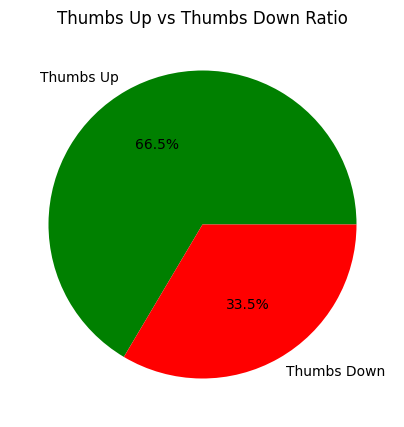

In [199]:
# Calculate the thumbs up and thumbs down ratio
thumbs_ratio = pd.DataFrame({
    'Metric': ['Thumbs Up', 'Thumbs Down'],
    'Total': [df['thumbs_up'].sum(), df['thumbs_down'].sum()]
})

# Create a pie chart for the thumbs up and thumbs down ratio
plt.figure(figsize=(5, 5))
plt.pie(thumbs_ratio['Total'], labels=thumbs_ratio['Metric'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Thumbs Up vs Thumbs Down Ratio")
plt.show()

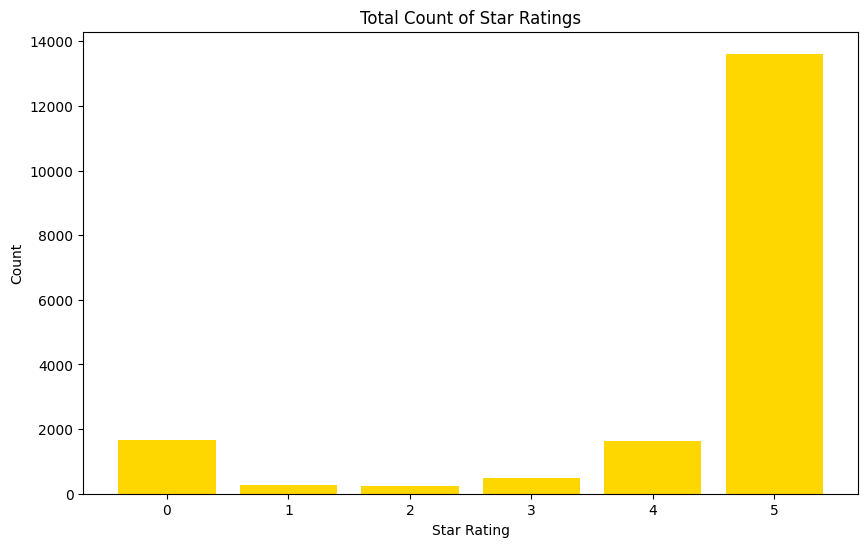

In [200]:
# Group by stars and calculate the total count of each star rating
star_counts = df.groupby('stars').size().reset_index(name='count')

# Create a bar chart for the total count of stars
plt.figure(figsize=(10, 6))
plt.bar(star_counts['stars'], star_counts['count'], color='gold')
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.title("Total Count of Star Ratings")
plt.xticks(star_counts['stars'])  # Ensure all star ratings are displayed
plt.show()

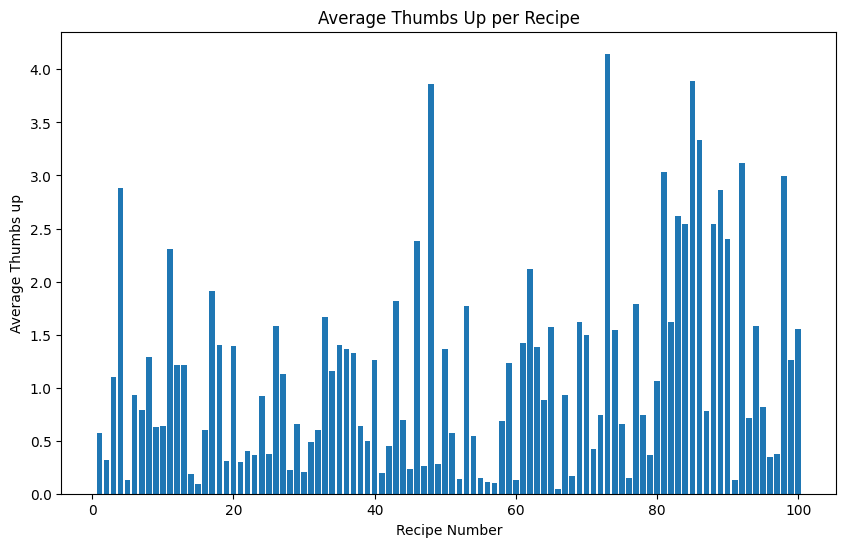

In [201]:
# Average Thumbs Up

plt.figure(figsize=(10, 6))
plt.bar(summary_stats['recipe_number'], summary_stats['avg_thumbs_up'])
plt.title("Average Thumbs Up per Recipe")
plt.xlabel("Recipe Number")
plt.ylabel("Average Thumbs up")
plt.show()

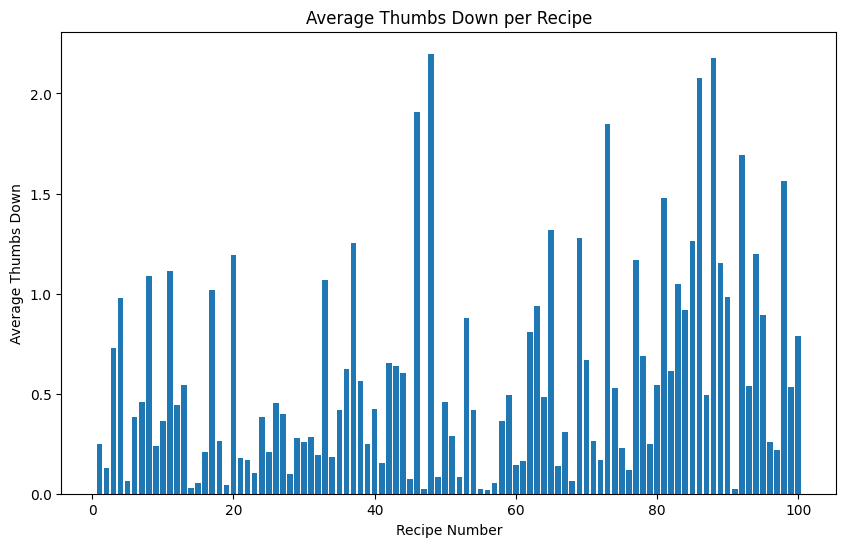

In [202]:
# 5. Average Thumbs Down
plt.figure(figsize=(10, 6))
plt.bar(summary_stats['recipe_number'], summary_stats['avg_thumbs_down'])
plt.title("Average Thumbs Down per Recipe")
plt.xlabel("Recipe Number")
plt.ylabel("Average Thumbs Down")
plt.show()

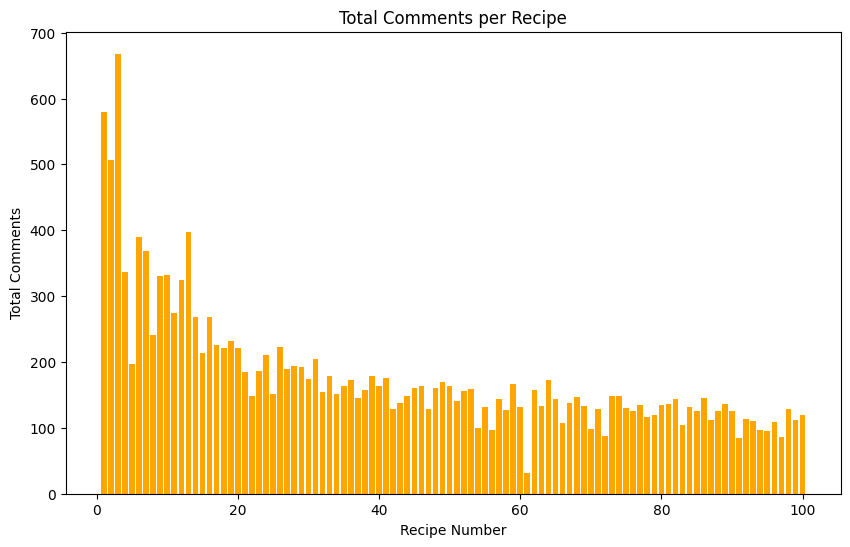

In [203]:
#Total Comments per Recipe
plt.figure(figsize=(10, 6))
plt.bar(summary_stats['recipe_number'], summary_stats['total_comments'], color='Orange')
plt.title("Total Comments per Recipe")
plt.xlabel("Recipe Number")
plt.ylabel("Total Comments")
plt.show()

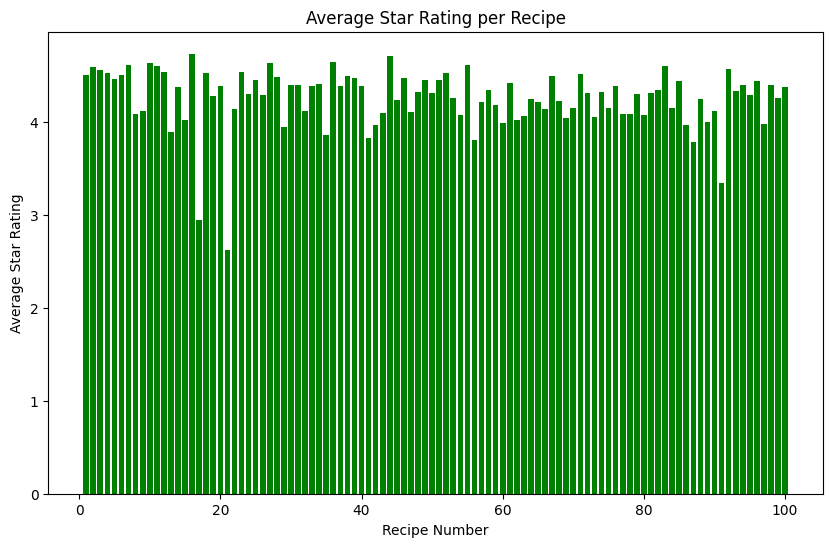

In [204]:
# 6. Average Star Rating
plt.figure(figsize=(10, 6))
plt.bar(summary_stats['recipe_number'], summary_stats['avg_star_rating'], color='Green')
plt.title("Average Star Rating per Recipe")
plt.xlabel("Recipe Number")
plt.ylabel("Average Star Rating")
plt.show()


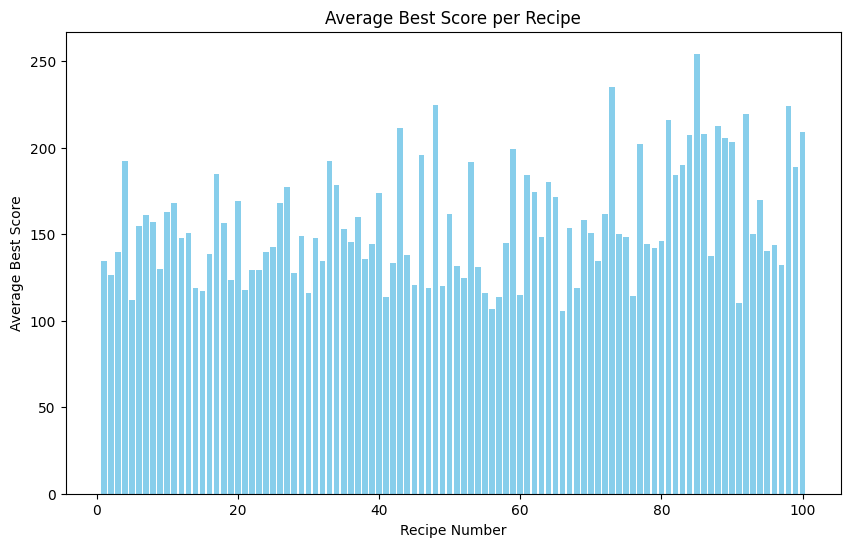

In [205]:
# 7. Average Best Score
plt.figure(figsize=(10, 6))
plt.bar(summary_stats['recipe_number'], summary_stats['avg_best_score'], color='skyblue')
plt.title("Average Best Score per Recipe")
plt.xlabel("Recipe Number")
plt.ylabel("Average Best Score")
plt.show()

In [206]:

# Add a ratio column for thumbs up to thumbs down
summary_stats['thumbs_up_to_down_ratio'] = summary_stats['avg_thumbs_up'] / summary_stats['avg_thumbs_down']

# Handle cases where thumbs down is 0 to avoid division by zero
summary_stats['thumbs_up_to_down_ratio'] = summary_stats['thumbs_up_to_down_ratio'].replace([float('inf'), -float('inf')], None).fillna(0)

# Display the updated summary table
summary_stats.head(10)

,recipe_number,total_comments,avg_user_reputation,avg_reply_count,avg_thumbs_up,avg_thumbs_down,avg_star_rating,avg_best_score,thumbs_up_to_down_ratio
0,1,580,1.465517,0.017241,0.572414,0.250000,4.501724,134.650000,2.289655
1,2,506,2.136364,0.009881,0.322134,0.130435,4.584980,126.377470,2.469697
2,3,668,1.679641,0.023952,1.098802,0.730539,4.559880,139.465569,1.504098
3,4,336,3.023810,0.008929,2.883929,0.976190,4.526786,192.044643,2.954268
4,5,197,1.477157,0.000000,0.131980,0.065990,4.461929,111.751269,2.000000
5,6,390,1.384615,0.015385,0.933333,0.382051,4.507692,154.500000,2.442953
6,7,368,1.877717,0.010870,0.785326,0.456522,4.608696,160.855978,1.720238
7,8,241,1.070539,0.008299,1.286307,1.087137,4.082988,157.103734,1.183206
8,9,331,1.416918,0.006042,0.625378,0.238671,4.114804,129.833837,2.620253
9,10,332,2.259036,0.006024,0.638554,0.361446,4.632530,162.746988,1.766667


In [207]:
df['best_score'].value_counts(ascending=False)

best_score
100    13704
193     1447
253      374
142      201
297      171
       ...  
227        1
905        1
499        1
719        1
889        1
Name: count, Length: 588, dtype: int64

Dataframe is already based top receipe (With recipe number = 1)

In [208]:
top_recipes = df.groupby(['recipe_number', 'recipe_name']).size().reset_index(name='total_comments')

top10 = top_recipes.sort_values(by='recipe_number', ascending=True)

top10.head(10)

,recipe_number,recipe_name,total_comments
0,1,Creamy White Chili,580
1,2,Best Ever Banana Bread,506
2,3,Cheeseburger Soup,668
3,4,Amish Breakfast Casserole,336
4,5,Pumpkin Spice Cupcakes with Cream Cheese Frosting,197
5,6,Favorite Chicken Potpie,390
6,7,Flavorful Chicken Fajitas,368
7,8,Apple Pie,241
8,9,Enchilada Casser-Ole!,331
9,10,Zucchini Pizza Casserole,332


In [209]:
recipe_total = df.groupby('recipe_number')
recipe_total

In [210]:
#Trying to understand the number of stars for each recipe number, what are the weights for each rating number

# Recipe 3 has more 5 stars and less 0 stars than recipe 1.... why is that? - Is the ratio different between 1,2 and 3

star_counts = df.groupby(['recipe_number', 'stars']).size().unstack(fill_value=0)
print("\nStar Counts for Each Recipe:")
print(star_counts)


Star Counts for Each Recipe:
stars           0  1  2   3   4    5
recipe_number                       
1              40  6  2  10  39  483
2              24  7  7   8  25  435
3              24  9  8  21  72  534
4              15  4  4  11  34  268
5              16  2  0   5   8  166
...            .. .. ..  ..  ..  ...
96              7  1  0   3  16   82
97             10  3  3   3  11   56
98              8  3  0   8  10   99
99              6  4  2   5  21   74
100             6  2  4   6  13   88

[100 rows x 6 columns]


In [211]:
#What is the ratio of 5 stars compared to other stars for each recipe

# Count total ratings for each recipe
total_counts = df.groupby('recipe_number').size().reset_index(name='total_ratings')

# Count 5-star ratings for each recipe
five_star_counts = df[df['stars'] == 5].groupby('recipe_number').size().reset_index(name='five_star_count')

# Merge total ratings and 5-star ratings
merged_counts = pd.merge(total_counts, five_star_counts, on='recipe_number', how='left')

# Fill NaN values in five_star_count (for recipes without any 5-star ratings) with 0
merged_counts['five_star_count'] = merged_counts['five_star_count'].fillna(0)

# Calculate the ratio of 5-star ratings to total ratings
merged_counts['five_star_ratio'] = merged_counts['five_star_count'] / merged_counts['total_ratings']

# Display the results
print("Five-Star Ratio for Each Recipe:")
print(merged_counts[['recipe_number', 'five_star_ratio']])

Five-Star Ratio for Each Recipe:
    recipe_number  five_star_ratio
0               1         0.832759
1               2         0.859684
2               3         0.799401
3               4         0.797619
4               5         0.842640
..            ...              ...
95             96         0.752294
96             97         0.651163
97             98         0.773438
98             99         0.660714
99            100         0.739496

[100 rows x 2 columns]


What are some other weights that would influence reviews
- Comments (Metrics) : Reviews can be weighted by who is reviewing the recipe as well
    - Engagement
        - Thumbs up / down for a comment
        - How many Replies the comment gets

- User characteristics (Reputation of the user)

### Engagement Metrics

In [212]:
# For users who didnt rate the recipe a level of stars, what should we do about this?
df[df['stars'] == 0]

,num_records,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,created_at_utc,sentence_vector
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,introduction mentioned cream cheese none liste...,2022-08-29 15:43:28+00:00,"[-0.001030292, 0.022385733, 0.028866565, 0.026..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,wonderful made chilistew night dinner church e...,2022-10-04 20:03:43+00:00,"[-0.0038231455, 0.035792112, 0.03739938, 0.022..."
7,7,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_24cuIEu6UoJvd5VRMAoqnTPR9wd,u_uj79hCc4xVhm,Towanka,1,1643942114,0,28,2,0,891,delicious make often one time daughter husband...,2022-02-04 02:35:14+00:00,"[-0.0023411943, 0.03955661, 0.042644616, 0.026..."
23,23,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_1vFabyuTl4d81ivTsJDdxKOnb0c,u_PbmqE1O8NisP,Carole368,1,1626160365,1,5,29,0,530,white chicken chili first experinced eating lo...,2021-07-13 07:12:45+00:00,"[-0.00021566096, 0.03091568, 0.037952174, 0.02..."
29,29,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_429116,u_1oKdQHNslBwfe7Rqe9Sg1ihg9Fs,Sue,1,1622648882,0,3,0,0,297,would make soup hit would add green chili make...,2021-06-02 15:48:02+00:00,"[0.00043846073, 0.0402858, 0.039477676, 0.0282..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18073,10,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_22bz3eijaJVHwIq6U1DNof4sofy,u_YVoGFuOfODqd,Brenda95,1,1645656112,0,13,5,0,759,made first time havent even time frost eat fol...,2022-02-23 22:41:52+00:00,"[0.00030655842, 0.03643406, 0.037489895, 0.030..."
18075,12,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_433901,u_1tOHv6m9wvBiAUjxjq5wafhtd8y,CyanSnow,0,1622648876,2,4,16,0,136,waste time ingredient cake ran never rise mise...,2021-06-02 15:47:56+00:00,"[-0.0017047689, 0.02973659, 0.034950405, 0.020..."
18103,40,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_382008,u_1oKcYtpym8MXOYhOI4nazwiulh1,susan croteau,1,1622718208,0,1,0,0,193,cake frozen,2021-06-03 11:03:28+00:00,"[-0.018611824, 0.05418031, 0.053494036, 0.0209..."
18126,63,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_233438,u_1oKXwltYerSFRssptbVx8eCKbyc,LutherHaith,1,1622717517,0,0,0,0,100,love making another one keep good work thank,2021-06-03 10:51:57+00:00,"[-0.006612259, 0.05479072, 0.049976327, 0.0283..."


In [213]:
df.groupby('recipe_number')['thumbs_up'].sum().reset_index()

,recipe_number,thumbs_up
0,1,332
1,2,163
2,3,734
3,4,969
4,5,26
...,...,...
95,96,38
96,97,32
97,98,383
98,99,141


In [214]:
df[df['thumbs_up'] == 0].head()

,num_records,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,created_at_utc,sentence_vector
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,tweaked little removed onion onion hater house...,2022-10-13 00:11:29+00:00,"[-0.002452917, 0.03672525, 0.038720723, 0.0255..."
9,9,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_24Fso1ApihQ91uCmNvhBDDO1k2P,u_cDoX9ujcQEoc,Susannah953,1,1643237839,0,0,0,5,404,make lot kid friend come ask make time,2022-01-26 22:57:19+00:00,"[-0.007842886, 0.046585646, 0.0460565, 0.03222..."
16,16,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_23Nduv3AAGtX0cmKaxLpQIOtGQz,u_zSpLgUzFZKjk,Petri,1,1641578704,0,0,0,4,449,delicious like mild chilli taste really would ...,2022-01-07 18:05:04+00:00,"[-0.0034770733, 0.04101927, 0.04044159, 0.0306..."
47,47,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_390899,u_1oKbx5JoINDESeKJ0bC0dePdWjv,YvonneHam,1,1622718244,0,0,7,5,100,changed little added carrot potato substituted...,2021-06-03 11:04:04+00:00,"[0.0035633487, 0.028042128, 0.030809347, 0.025..."
51,51,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_419232,u_1oKdPv2hU2DTXXoLOpYVXeJClrb,Bonnie,1,1622718419,0,0,0,5,100,recipe awesome made iver time big hit family,2021-06-03 11:06:59+00:00,"[-2.6193533e-05, 0.029106885, 0.03799106, 0.02..."


### User Metrics (Characteristics and Reputation)

In [215]:
# Group by user_name and compute metrics
user_metrics = df.groupby('user_name').agg(
    total_comments=('comment_id', 'count'),        # Total number of comments
    total_user_reputation=('user_reputation', 'count'),  # Average user reputation
    total_reply_count=('reply_count', 'mean'),
    avg_reply_count=('reply_count', 'mean'),       # Average reply count
    total_thumbs_up=('thumbs_up', 'count'),
    avg_thumbs_up=('thumbs_up', 'mean'),           # Average thumbs up
    avg_thumbs_down=('thumbs_down', 'mean'),       # Average thumbs down
    total_thumbs_down=('thumbs_down', 'count'),
    avg_star_rating=('stars', 'mean'),             # Average star rating
    avg_best_score=('best_score', 'mean')          # Average best score
).reset_index()

# Display the user metrics - Most engaging users
user_metrics.sort_values(by='total_comments', ascending=False)

,user_name,total_comments,total_user_reputation,total_reply_count,avg_reply_count,total_thumbs_up,avg_thumbs_up,avg_thumbs_down,total_thumbs_down,avg_star_rating,avg_best_score
53,2124arizona,28,28,0.00,0.00,28,1.107143,0.214286,28,5.000000,183.464286
2768,JGa2595176,27,27,0.00,0.00,27,1.592593,0.259259,27,4.555556,212.592593
5017,No_Time_To_Cook,25,25,0.00,0.00,25,0.840000,0.480000,25,4.720000,179.480000
11180,mjlouk,25,25,0.04,0.04,25,0.360000,0.040000,25,4.560000,163.360000
9744,justmbeth,23,23,0.00,0.00,23,0.304348,0.086957,23,4.956522,119.478261
...,...,...,...,...,...,...,...,...,...,...,...
4780,Momof4sillies,1,1,0.00,0.00,1,0.000000,0.000000,1,5.000000,100.000000
4781,Momof4sweeties,1,1,0.00,0.00,1,0.000000,0.000000,1,5.000000,100.000000
4782,MomofZs,1,1,0.00,0.00,1,0.000000,1.000000,1,4.000000,100.000000
4783,Momstar3,1,1,0.00,0.00,1,0.000000,0.000000,1,5.000000,100.000000


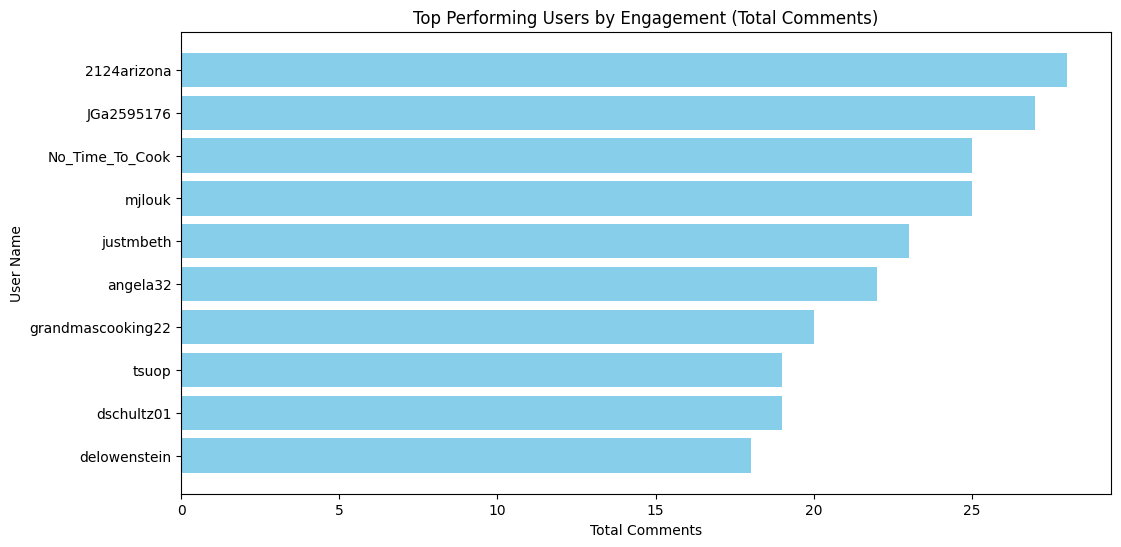

In [216]:
# Filter the top-performing users based on total comments
top_users = user_metrics.sort_values(by='total_comments', ascending=False).head(10)

# Create a horizontal bar chart for visualization
plt.figure(figsize=(12, 6))
plt.barh(top_users['user_name'], top_users['total_comments'], color='skyblue')
plt.xlabel("Total Comments")
plt.ylabel("User Name")
plt.title("Top Performing Users by Engagement (Total Comments)")
plt.gca().invert_yaxis()  # Invert y-axis to show highest engagement at the top
plt.show()

In [217]:
#Seems as if thumbs up has a higher weight in terms of generating a higher score

user_metrics.sort_values(by='avg_best_score', ascending=False)

,user_name,total_comments,total_user_reputation,total_reply_count,avg_reply_count,total_thumbs_up,avg_thumbs_up,avg_thumbs_down,total_thumbs_down,avg_star_rating,avg_best_score
5585,Ruth147,1,1,0.0,0.0,1,28.0,0.0,1,5.0,931.0
463,Ashley748,1,1,0.0,0.0,1,27.0,0.0,1,5.0,928.0
12628,sligoe,1,1,0.0,0.0,1,41.0,2.0,1,0.0,922.0
1531,Debbie549,1,1,0.0,0.0,1,32.0,1.0,1,5.0,918.0
3239,Judy021,1,1,1.0,1.0,1,27.0,0.0,1,4.0,912.0
...,...,...,...,...,...,...,...,...,...,...,...
2407,Guest5824,1,1,0.0,0.0,1,0.0,6.0,1,5.0,0.0
2408,Guest586,1,1,0.0,0.0,1,0.0,3.0,1,0.0,0.0
457,AshenOne,1,1,0.0,0.0,1,0.0,20.0,1,0.0,0.0
8463,dusk5633,1,1,1.0,1.0,1,0.0,25.0,1,0.0,0.0


In [218]:
df[df['user_name'] == 'Ruth147']

,num_records,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,created_at_utc,sentence_vector
11168,13,46,18345,Simple Au Gratin Potatoes,sp_aUSaElGf_18345_c_1zh7UbnxXFCNCAYBGPmHhMfi8wX,u_mMj2pk5kz3wY,Ruth147,1,1634588483,0,28,0,5,931,followed recipe using whole milk extra sharp c...,2021-10-18 20:21:23+00:00,"[0.0019437898, 0.03764177, 0.039676048, 0.0254..."


In [219]:
user_metrics.sort_values(by='total_reply_count', ascending=False)

,user_name,total_comments,total_user_reputation,total_reply_count,avg_reply_count,total_thumbs_up,avg_thumbs_up,avg_thumbs_down,total_thumbs_down,avg_star_rating,avg_best_score
2001,Frances442,1,1,3.0,3.0,1,0.0,0.0,1,0.0,505.0
3311,K,1,1,3.0,3.0,1,6.0,41.0,1,0.0,127.0
10253,ladypenny36619,1,1,3.0,3.0,1,1.0,20.0,1,5.0,495.0
1857,Elle,1,1,3.0,3.0,1,4.0,61.0,1,2.0,110.0
2831,James626,1,1,3.0,3.0,1,15.0,31.0,1,0.0,549.0
...,...,...,...,...,...,...,...,...,...,...,...
4597,Metrocookbookdivany,1,1,0.0,0.0,1,0.0,0.0,1,5.0,100.0
4598,MexicanFoodLover,1,1,0.0,0.0,1,0.0,0.0,1,5.0,100.0
4599,Mgangluff,1,1,0.0,0.0,1,0.0,0.0,1,5.0,100.0
4600,Mhavener,1,1,0.0,0.0,1,0.0,0.0,1,5.0,100.0


<Axes: xlabel='stars', ylabel='Count'>

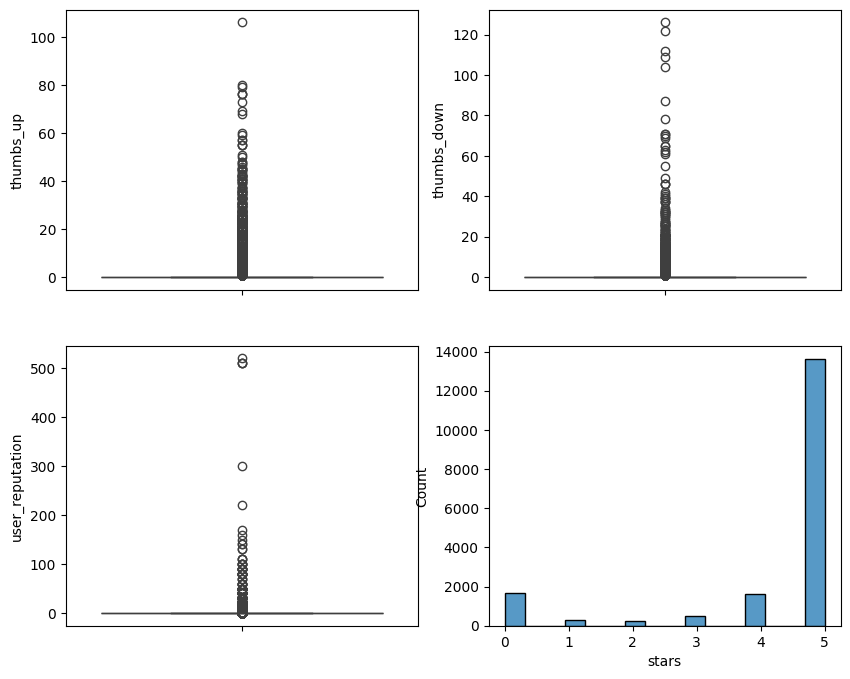

In [220]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(df['thumbs_up'], ax=ax1)
sns.boxplot(df['thumbs_down'], ax=ax2)
sns.boxplot(df['user_reputation'], ax=ax3)
sns.histplot(df['stars'], ax=ax4)

<Axes: xlabel='best_score', ylabel='Count'>

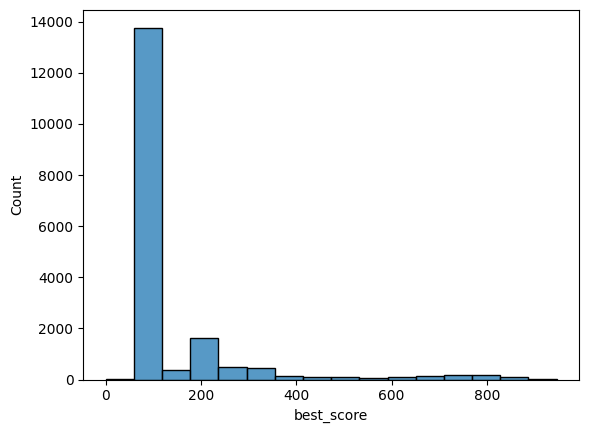

In [221]:
sns.histplot(df['best_score'])

/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_33359/3393906911.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  comment_volume = df.groupby(df['created_at_utc'].dt.to_period('M')).size().reset_index(name='comment_count')


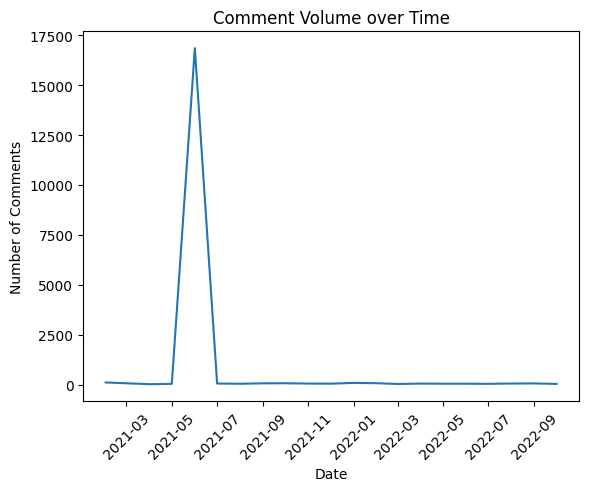

In [222]:
comment_volume = df.groupby(df['created_at_utc'].dt.to_period('M')).size().reset_index(name='comment_count')

plt.plot(comment_volume['created_at_utc'].dt.to_timestamp(), comment_volume['comment_count'])
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Number of Comments')
plt.title('Comment Volume over Time')
plt.show()

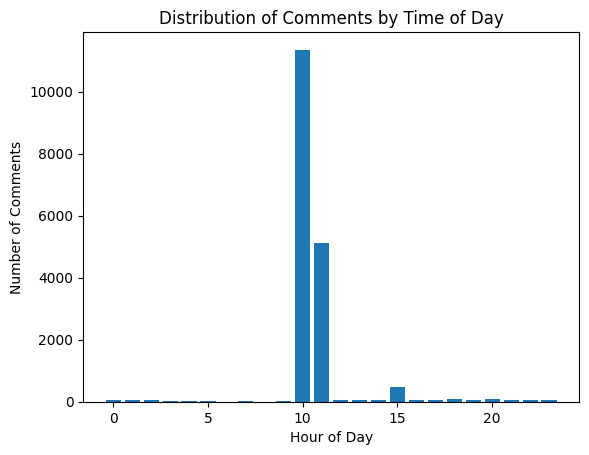

In [223]:
#Majority of comments occur at 10/11 am (Before lunch time to prep the recipe???)

df['hour'] = df['created_at_utc'].dt.hour

hourly_distribution = df.groupby('hour').size().reset_index(name='comment_count')

#Plot the distribution
plt.bar(hourly_distribution['hour'], hourly_distribution['comment_count'])
plt.xlabel('Hour of Day')
plt.ylabel('Number of Comments')
plt.title('Distribution of Comments by Time of Day')
plt.show()

/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_33359/3186132810.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  sentiment_trend = df.groupby(df['created_at_utc'].dt.to_period('D'))['sentiment'].mean().reset_index()


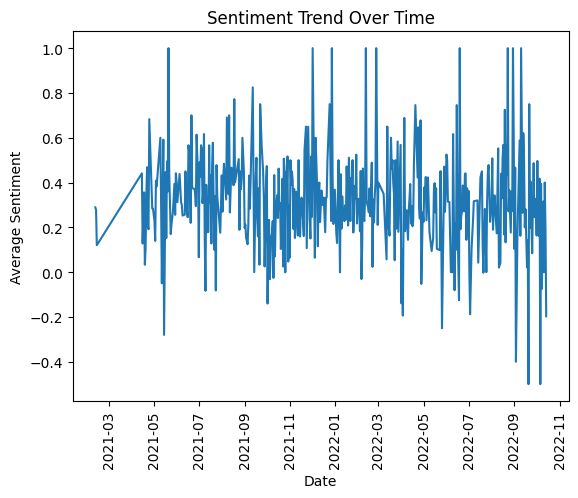

In [224]:
from textblob import TextBlob

# Calculate sentiment polarity for each comment
df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Group by day and calculate average sentiment
sentiment_trend = df.groupby(df['created_at_utc'].dt.to_period('D'))['sentiment'].mean().reset_index()

# Plot sentiment over time
plt.plot(sentiment_trend['created_at_utc'].dt.to_timestamp(), sentiment_trend['sentiment'])
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Average Sentiment')
plt.title('Sentiment Trend Over Time')
plt.show()

/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_33359/3596706388.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  metrics_trend = df.groupby(df['created_at_utc'].dt.to_period('D'))[['reply_count', 'thumbs_up', 'thumbs_down']].mean().reset_index()


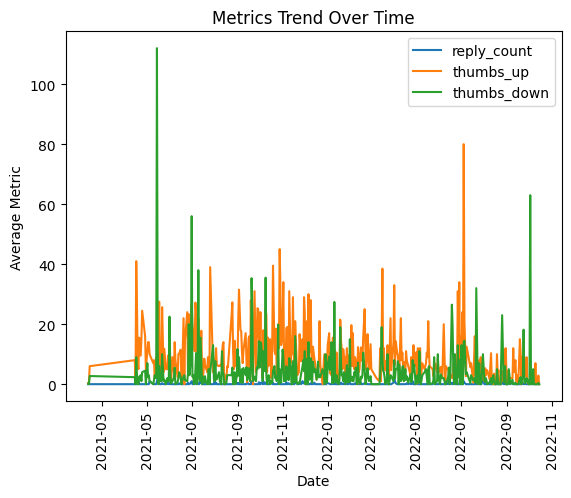

In [225]:
# Group by day and calculate averages
metrics_trend = df.groupby(df['created_at_utc'].dt.to_period('D'))[['reply_count', 'thumbs_up', 'thumbs_down']].mean().reset_index()

# Plot each metric over time
for metric in ['reply_count', 'thumbs_up', 'thumbs_down']:
    plt.plot(metrics_trend['created_at_utc'].dt.to_timestamp(), metrics_trend[metric], label=metric)

plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Average Metric')
plt.title('Metrics Trend Over Time')
plt.legend()
plt.show()

In [226]:
# Sort the dataset by 'thumbs_up' in descending order
top_thumbs_up_comments = df.sort_values(by='thumbs_up', ascending=False)

# Select relevant columns to display (including recipe_number and the full text comment)
top_comments = top_thumbs_up_comments[['recipe_number', 'text', 'thumbs_up']].head(30)

# Display the top comments with the highest thumbs up
top_comments.reset_index()

,index,recipe_number,text,thumbs_up
0,15852,81,goodeasy recipe u snarky bully feel need comme...,106
1,14778,73,fat free half half half half skim milk lot sug...,80
2,13347,62,enjoys review rarely make recipe jawdropping a...,79
3,4191,11,recipe one tends adjust taste said toh altered...,76
4,16877,89,remember time long long ago lolwhen mom making...,76
5,16497,86,like ingredient portion put together upright m...,76
6,4473,12,really liked recipe family make minor change h...,73
7,1192,3,look delicious want make slow cooker anything ...,69
8,3433,9,im always surprised someone change recipe rate...,68
9,17010,90,made company tonight served warm vanilla ice c...,60


### Predict User Ratings (Stars) Based on the Review Text - Multi-Class Classification

## Classify User Sentiment using Neural Networks

### Neural Networks

In [227]:
#Function for user sentiment - Change this

def sentiment_label(row):
    if row['stars'] >= 4 or row['thumbs_up'] > row['thumbs_down']:
        return 1  # Positive sentiment
    else:
        return 0  # Negative sentiment

df['sentiment'] = df.apply(sentiment_label, axis=1)


In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [233]:
early_stopping = EarlyStopping(
    monitor='val_loss',       # Monitor validation loss
    patience=3,               # Stop after 3 epochs with no improvement
    restore_best_weights=True # Restore weights from the best epoch
)

### Recurrent Neural Network (RNN)

In [235]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization


# Define the RNN model
rnn_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),  # Embedding layer
    LSTM(64, return_sequences=False),  # LSTM layer
    Dropout(0.5),  # Dropout for regularization
    Dense(32, activation='relu'),  # Fully connected layer
    BatchNormalization(),
    Dense(1, activation='tanh')  # Output layer 
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the RNN model with EarlyStopping
rnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,  # Set a high max number of epochs
    batch_size=32,
    callbacks=[early_stopping]  # Add EarlyStopping to the callbacks list
)

Epoch 1/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.5376 - loss: 0.3635 - val_accuracy: 0.8862 - val_loss: 0.0978
Epoch 2/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.8881 - loss: 0.0886 - val_accuracy: 0.8867 - val_loss: 0.0911
Epoch 3/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step - accuracy: 0.9133 - loss: 0.0696 - val_accuracy: 0.8867 - val_loss: 0.0936
Epoch 4/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.9257 - loss: 0.0617 - val_accuracy: 0.8778 - val_loss: 0.0982
Epoch 5/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step - accuracy: 0.9453 - loss: 0.0485 - val_accuracy: 0.8440 - val_loss: 0.1271


### Convolutional Neural Network (CNN)

In [236]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

# Define the CNN model
cnn_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),  # Embedding layer
    Conv1D(128, 5, activation='relu'),  # 1D Convolutional layer
    GlobalMaxPooling1D(),  # Global max pooling
    Dropout(0.5),  # Dropout for regularization
    Dense(32, activation='relu'),  # Fully connected layer
    BatchNormalization(),
    Dense(1, activation='tanh')  # Output layer (sentiment: -1 to 1)
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32, callbacks=[early_stopping])

Epoch 1/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.5948 - loss: 0.4718 - val_accuracy: 0.8862 - val_loss: 0.0996
Epoch 2/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8785 - loss: 0.0988 - val_accuracy: 0.8921 - val_loss: 0.0865
Epoch 3/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9055 - loss: 0.0767 - val_accuracy: 0.8929 - val_loss: 0.0873
Epoch 4/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9228 - loss: 0.0648 - val_accuracy: 0.8895 - val_loss: 0.0883
Epoch 5/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9345 - loss: 0.0551 - val_accuracy: 0.8881 - val_loss: 0.0908


### Long Short-Term Memory Networks (LSTMs)

In [237]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the LSTM model
lstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),  # Embedding layer
    LSTM(64, return_sequences=False),  # LSTM layer (use return_sequences=True for stacked LSTMs)
    Dropout(0.5),  # Dropout for regularization
    Dense(32, activation='relu'),  # Fully connected layer
    BatchNormalization(),
    Dense(1, activation='sigmoid')  # Output layer (binary sentiment: 0 or 1)
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32, callbacks=[early_stopping])

Epoch 1/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.7862 - loss: 0.4999 - val_accuracy: 0.8862 - val_loss: 0.3290
Epoch 2/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 29s 64ms/step - accuracy: 0.8969 - loss: 0.2905 - val_accuracy: 0.8817 - val_loss: 0.3278
Epoch 3/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.9253 - loss: 0.2196 - val_accuracy: 0.8820 - val_loss: 0.3492


In [239]:
from sklearn.metrics import classification_report 

# Predict and evaluate RNN model
rnn_predictions = (rnn_model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary
print("RNN Model Classification Report:")
print(classification_report(y_test, rnn_predictions))

# Predict and evaluate CNN model
cnn_predictions = (cnn_model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary
print("CNN Model Classification Report:")
print(classification_report(y_test, cnn_predictions))

# Predict and evaluate LSTM model
lstm_predictions = (lstm_model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary
print("LSTM Model Classification Report:")
print(classification_report(y_test, lstm_predictions))

112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
RNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.10      0.17       407
           1       0.90      0.99      0.94      3169

    accuracy                           0.89      3576
   macro avg       0.70      0.55      0.56      3576
weighted avg       0.85      0.89      0.85      3576

112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
CNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.09      0.16       407
           1       0.89      1.00      0.94      3169

    accuracy                           0.89      3576
   macro avg       0.80      0.54      0.55      3576
weighted avg       0.87      0.89      0.85      3576

112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
LSTM Model Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       407
           1

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

### CNN Is the Best Model 

Chosing Optimal Model

In [ ]:
# Predict sentiment for new data
predicted_sentiment = cnn_model.predict(X_test)  # Or rnn_model.predict(X_test)

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
# Predict sentiment for all comments
df['predicted_sentiment'] = cnn_model.predict(X).flatten()

# Assign a label based on predicted sentiment
df['sentiment_label'] = df['predicted_sentiment'].apply(lambda x: 'positive' if x > 0.5 else 'negative')

569/569 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [ ]:
# Filter for positive sentiment
positive_sentiment = df[df['sentiment_label'] == 'positive']

# Group recipes by recipe_number and include recipe_name
positive_recipes = positive_sentiment.groupby(['recipe_number', 'recipe_name']).agg(
    total_positive_comments=('comment_id', 'count'),
    avg_stars=('stars', 'mean'),
    avg_thumbs_up=('thumbs_up', 'mean'),
    avg_thumbs_down=('thumbs_down', 'mean')
).reset_index()

# Sort recipes by total positive comments or average stars
# Add a thumbs up to thumbs down ratio as a new feature
recommended_recipes['thumbs_ratio'] = recommended_recipes['avg_thumbs_up'] / (recommended_recipes['avg_thumbs_down'] + 1e-5)  # To avoid division by zero

# Optional: Add a normalized difference as another feature
recommended_recipes['thumbs_diff'] = recommended_recipes['avg_thumbs_up'] - recommended_recipes['avg_thumbs_down']



recommended_recipes = positive_recipes.sort_values(by='recipe_number', ascending=True)

# Display the top recommended recipes with recipe names
recommended_recipes.head(10)

,recipe_number,recipe_name,total_positive_comments,avg_stars,avg_thumbs_up,avg_thumbs_down
0,1,Creamy White Chili,624,4.629808,0.522436,0.157051
1,2,Best Ever Banana Bread,493,4.683570,0.322515,0.099391
2,3,Cheeseburger Soup,693,4.709957,1.010101,0.447330
3,4,Amish Breakfast Casserole,322,4.658385,2.978261,0.779503
4,5,Pumpkin Spice Cupcakes with Cream Cheese Frosting,188,4.601064,0.138298,0.069149
5,6,Favorite Chicken Potpie,378,4.642857,0.949735,0.367725
6,7,Flavorful Chicken Fajitas,359,4.715877,0.802228,0.412256
7,8,Apple Pie,216,4.430556,1.240741,0.634259
8,9,Enchilada Casser-Ole!,376,4.452128,0.547872,0.204787
9,10,Zucchini Pizza Casserole,322,4.717391,0.658385,0.347826


### Recommendation Model

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Select relevant features for similarity (e.g., stars, thumbs_up, thumbs_down)
features = ['avg_stars', 'avg_thumbs_up', 'avg_thumbs_down']

# Calculate cosine similarity between recipes
recipe_features = recommended_recipes[features]
similarity_matrix = cosine_similarity(recipe_features)

# Find recipes similar to a given recipe (e.g., recipe_number = 14299)
target_recipe_index = recommended_recipes[recommended_recipes['recipe_number'] == 1].index[0]
similar_recipes = similarity_matrix[target_recipe_index]

# Add similarity scores to the dataframe
recommended_recipes['similarity'] = similar_recipes

# Sort by similarity and display top recommendations
similar_recipes_sorted = recommended_recipes.sort_values(by='similarity', ascending=False)
similar_recipes_sorted.head(10)

#The results below are the recommended recipes based on the chosen one being Recipe #1

,recipe_number,recipe_name,total_positive_comments,avg_stars,avg_thumbs_up,avg_thumbs_down,similarity
0,1,Creamy White Chili,624,4.629808,0.522436,0.157051,1.000000
38,39,Shrimp Scampi,177,4.485876,0.474576,0.209040,0.999896
21,22,Baked Spaghetti,140,4.228571,0.414286,0.150000,0.999891
8,9,Enchilada Casser-Ole!,376,4.452128,0.547872,0.204787,0.999878
50,51,Fluffy Pancakes,132,4.659091,0.530303,0.075758,0.999846
15,16,Rustic Italian Tortellini Soup,267,4.737828,0.606742,0.209738,0.999836
20,21,Pineapple Orange Cake,142,3.380282,0.394366,0.190141,0.999748
96,97,Lime Chicken Tacos,77,4.246753,0.402597,0.220779,0.999679
78,79,Chocolate Chip Oatmeal Cookies,110,4.554545,0.390909,0.172727,0.999634
30,31,Basic Banana Muffins,201,4.452736,0.497512,0.288557,0.999531


In [ ]:
#Results Check - Need to fix the conditions - Switch avg thumbs up and thumbs down metrics to decrease simularity 

# Extract feature vectors for both recipes
creamy_white_chili = recommended_recipes[recommended_recipes['recipe_name'] == "Creamy White Chili"][features]
cheeseburger_soup = recommended_recipes[recommended_recipes['recipe_name'] == "Cheeseburger Soup"][features]

print("Feature Vector for Creamy White Chili:")
print(creamy_white_chili)

print("Feature Vector for Cheeseburger Soup:")
print(cheeseburger_soup)

Feature Vector for Creamy White Chili:
   avg_stars  avg_thumbs_up  avg_thumbs_down
0   4.629808       0.522436         0.157051
Feature Vector for Cheeseburger Soup:
   avg_stars  avg_thumbs_up  avg_thumbs_down
2   4.709957       1.010101          0.44733


# Time Series Model

In [ ]:
df.set_index('created_at_utc', inplace=True)

# Filter for 5-star ratings
five_star_data = df[df['stars'] == 5]

# Resample by month (M) or day (D)
five_star_counts = five_star_data.resample('M').size()  # Change 'M' to 'D' for daily or 'W' for weekly

/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_52967/292421033.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  five_star_counts = five_star_data.resample('M').size()  # Change 'M' to 'D' for daily or 'W' for weekly


In [ ]:
df['created_at_utc'] = pd.to_datetime(df['created_at_utc'], errors='coerce')
df.set_index('created_at_utc', inplace=True)

df = df.dropna(subset=['created_at_utc'])

# Resample by month (M)
five_star_counts = df[df['stars'] == 5].resample('M').size()

# Ensure the index is datetime
print(five_star_counts.index)

KeyError: 'created_at_utc'

In [ ]:
# Plot the time series
five_star_counts['five_star_count'].plot(figsize=(12, 6))
plt.title('Daily 5-Star Ratings')
plt.xlabel('Date')
plt.ylabel('Count of 5-Star Ratings')
plt.show()

KeyError: 'five_star_count'

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result = adfuller(five_star_counts['five_star_count'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# If p-value > 0.05, the data is non-stationary and needs differencing

ADF Statistic: -19.010462418858275
p-value: 0.0


In [ ]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Use auto_arima to find the best parameters (Grid search for ARIMA)
stepwise_model = auto_arima(five_star_counts['five_star_count'], seasonal=False, trace=True, suppress_warnings=True)
print(stepwise_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=6004.061, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5996.172, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5997.977, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5997.997, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5999.997, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5997.004, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.059 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  379
Model:                        SARIMAX   Log Likelihood               -2997.086
Date:                Mon, 09 Dec 2024   AIC                           5996.172
Time:                        21:36:26   BIC                           6000.110
Sample:                             0   HQIC                          5997.735
          

In [ ]:
# Define and fit the ARIMA model
model = ARIMA(five_star_counts['five_star_count'], order=(1, 1, 0))  # Replace (p, d, q) with actual values
arima_result = model.fit()

# Print model summary
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:        five_star_count   No. Observations:                  379
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3064.851
Date:                Mon, 09 Dec 2024   AIC                           6133.701
Time:                        21:36:26   BIC                           6141.571
Sample:                             0   HQIC                          6136.824
                                - 379                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4879      0.006    -87.323      0.000      -0.499      -0.477
sigma2      6.473e+05   4919.486    131.569      0.000    6.38e+05    6.57e+05
Ljung-Box (L1) (Q):                   9.87   Jarque-

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


379    3.048506
380    4.000588
381    3.536093
382    3.762708
383    3.652148
384    3.706087
385    3.679772
386    3.692610
387    3.686347
388    3.689403
389    3.687912
390    3.688639
391    3.688284
392    3.688457
393    3.688373
394    3.688414
395    3.688394
396    3.688404
397    3.688399
398    3.688401
399    3.688400
400    3.688401
401    3.688401
402    3.688401
403    3.688401
404    3.688401
405    3.688401
406    3.688401
407    3.688401
408    3.688401
Name: predicted_mean, dtype: float64


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


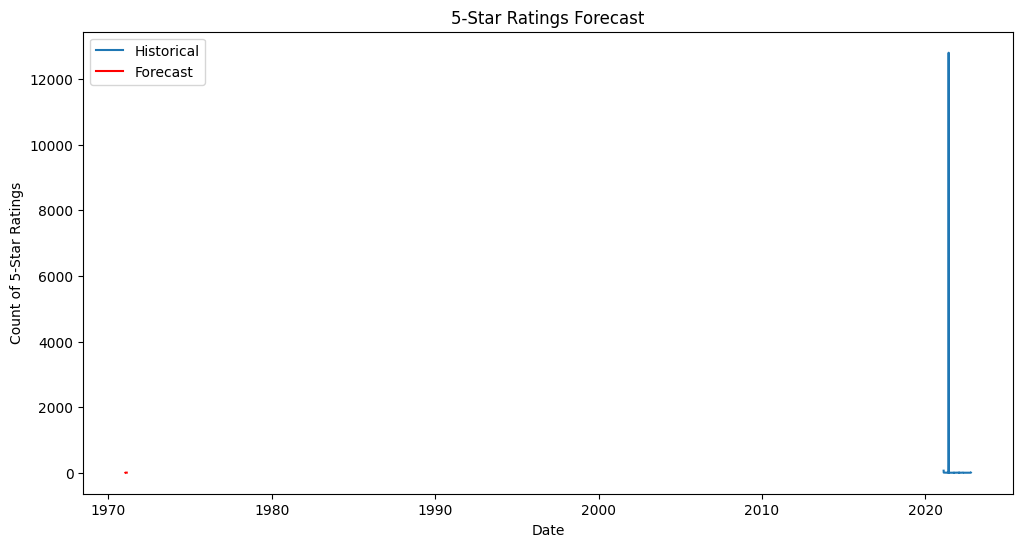

In [ ]:
# Forecast the next 30 days
forecast = arima_result.forecast(steps=30)
print(forecast)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(five_star_counts['five_star_count'], label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.title('5-Star Ratings Forecast')
plt.xlabel('Date')
plt.ylabel('Count of 5-Star Ratings')
plt.legend()
plt.show()

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Predicti

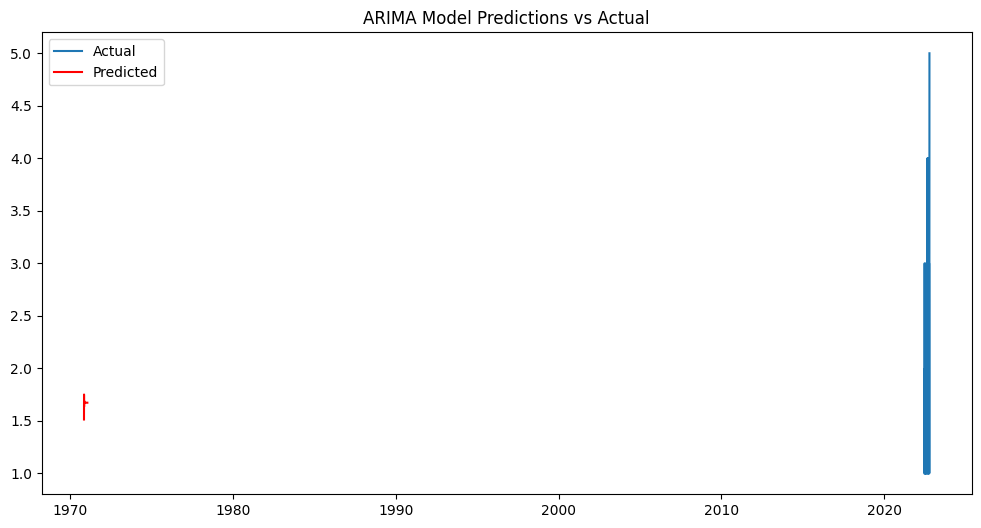

In [ ]:
train_size = int(len(five_star_counts) * 0.8)
train, test = five_star_counts.iloc[:train_size], five_star_counts.iloc[train_size:]

# Fit ARIMA on the train set
model = ARIMA(train['five_star_count'], order=(1, 1, 0))
arima_result = model.fit()

# Predict on the test set
predictions = arima_result.forecast(steps=len(test))

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test['five_star_count'], label='Actual')
plt.plot(predictions, label='Predicted', color='red')
plt.title('ARIMA Model Predictions vs Actual')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test['five_star_count'], predictions)
mae = mean_absolute_error(test['five_star_count'], predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.8468299691701009
Mean Absolute Error: 0.7384111649552614
